## Coded By Frank Zhao

#### To solve autofill not functioning in Jupyter Lab, use the code below

In [229]:
%config Completer.use_jedi = False

In [81]:
import pandas as pd
import numpy as np 
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import re
import nltk
import pickle
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

### Import data

In [82]:
imdb = pd.read_csv(".\data\IMDB.csv")

In [83]:
imdb.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [84]:
## check for data balance
imdb['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

### Data Pre-processing

In [85]:
pwd

'H:\\Projects\\Drexel\\Capstone II'

### lowercase


In [86]:
imdb['review'] = imdb['review'].str.lower()

In [87]:
imdb['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

In [88]:
## import stopwords
with open(".\data\Exports\master_sw.data", "rb") as file:
    stopwords = pickle.load(file)

In [89]:
## copy dataframe
df = imdb.copy()

### remove <br\>

In [90]:
df['review']= df['review'].str.replace('<.*?>', "")

<ipython-input-90-8b1516f6d381>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review']= df['review'].str.replace('<.*?>', "")


### remove `'` ,puncuation and symbols

In [91]:
df['review'] = df['review'].str.replace("'", " ")

df['review'] = df['review'].str.replace("[^\w\s]"," ")

<ipython-input-91-840fa8b1a4df>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'] = df['review'].str.replace("[^\w\s]"," ")


In [92]:
%%time
## remove stopwords
df['review_token'] = df['review'].apply(lambda x: [word for word in x.split() if word not in stopwords])

Wall time: 56.4 s


In [93]:
print(df['review_token'][0])

['reviewers', 'mentioned', 'watching', '1', 'oz', 'episode', 'hooked', 'right', 'exactly', 'happened', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'trust', 'faint', 'hearted', 'timid', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focuses', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'aryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'far', 'away', 'main', 'appeal', 'fact', 'goes', 'shows', 'dare', 'forget', 'pretty', 'pictures', 'painted', 'mainstream', 'audiences', 'forget', 'charm', 'forget', 'romance', 'oz', 'mess', 'episode', 'saw', 'struck', 'nasty', 'surreal', 'r

### Lemmatization

In [94]:
WNlemma = nltk.WordNetLemmatizer()

In [95]:
%%time
df['lemma_review'] = df['review_token'].apply(lambda x: [WNlemma.lemmatize(word) for word in x])

Wall time: 13.6 s


In [96]:
print(df['lemma_review'][0])

['reviewer', 'mentioned', 'watching', '1', 'oz', 'episode', 'hooked', 'right', 'exactly', 'happened', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scene', 'violence', 'set', 'right', 'word', 'trust', 'faint', 'hearted', 'timid', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'aryan', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'scuffle', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'far', 'away', 'main', 'appeal', 'fact', 'go', 'show', 'dare', 'forget', 'pretty', 'picture', 'painted', 'mainstream', 'audience', 'forget', 'charm', 'forget', 'romance', 'oz', 'mess', 'episode', 'saw', 'struck', 'nasty', 'surreal', 'ready', 'watched', 'develop

### Trigrams

In [97]:
%%time
df['trigram'] = df['lemma_review'].apply(lambda x: ["_".join(tup) for tup in list(nltk.ngrams(x, 3))])

Wall time: 1.69 s


* Positive

In [115]:
df_pos = df[df['sentiment'] == 'positive']

In [116]:
df_pos_list = df_pos['trigram'].tolist()

In [117]:
all_pos_trigram = []
for l in df_pos_list:
    all_pos_trigram += l

In [124]:
%%time
#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(1, 1))
bag_of_words = vectorizer.fit_transform(all_pos_trigram)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
pos_words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
pos_words_freq =sorted(pos_words_freq, key = lambda x: x[1], reverse=True)
print (pos_words_freq[:100])

[('new_york_city', 195), ('world_war_ii', 167), ('based_true_story', 144), ('best_movie_seen', 115), ('seen_long_time', 91), ('highly_recommend_movie', 86), ('international_film_festival', 84), ('feel_good_movie', 79), ('rock_n_roll', 78), ('william_h_macy', 70), ('highly_recommend_film', 70), ('second_world_war', 68), ('low_budget_film', 66), ('sci_fi_movie', 65), ('best_film_seen', 64), ('tour_de_force', 62), ('george_c_scott', 61), ('story_take_place', 60), ('movie_worth_watching', 60), ('12_year_old', 60), ('vote_title_brazil', 60), ('kung_fu_movie', 58), ('year_old_boy', 58), ('10_year_old', 57), ('40_year_old', 56), ('sci_fi_film', 55), ('movie_10_10', 55), ('breath_fresh_air', 53), ('definitely_worth_seeing', 51), ('film_worth_watching', 50), ('year_old_girl', 49), ('film_take_place', 49), ('14_year_old', 49), ('samuel_l_jackson', 48), ('movie_pretty_good', 47), ('good_old_fashioned', 47), ('low_budget_horror', 46), ('martial_art_movie', 46), ('7_5_10', 46), ('pretty_good_movie'

In [119]:
WC_height = 750
WC_width = 1500
WC_max_words = 100
max_font_size=325
colormap='Accent'

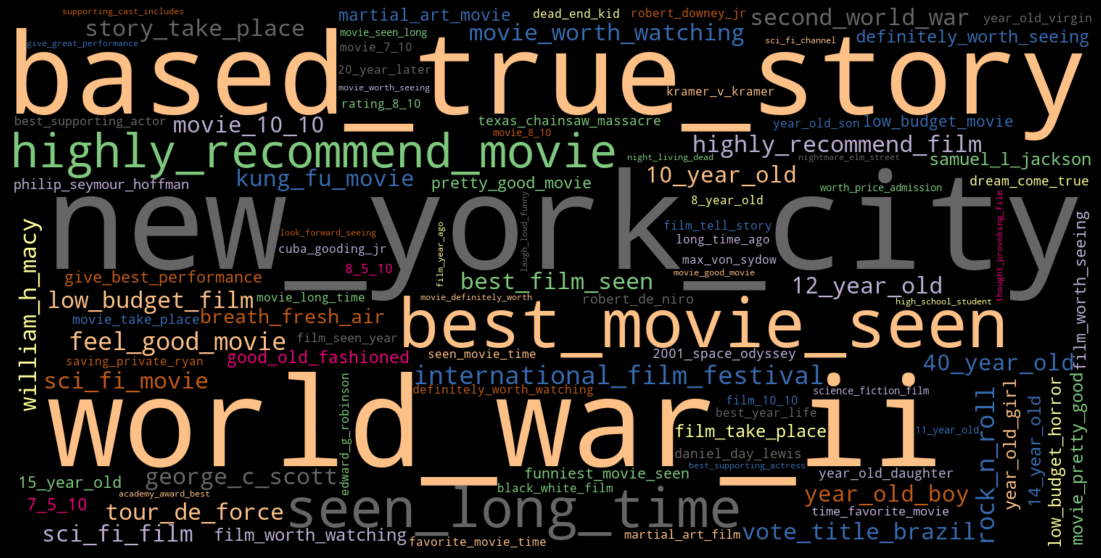

Wall time: 3.16 s


In [125]:
%%time
pos_words_dict = dict(pos_words_freq)
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=stopwords, colormap=colormap)
wordCloud.generate_from_frequencies(pos_words_dict)

plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordCloud.to_file('wordcloud_pos_trigram.jpg')

* Negative

In [121]:
df_neg = df[df['sentiment'] == 'negative']

In [122]:
df_neg_list = df_neg['trigram'].tolist()

In [123]:
all_neg_trigram = []
for l in df_neg_list:
    all_neg_trigram += l

In [127]:
%%time
#Using count vectoriser to view the frequency of trigrams
vectorizer = CountVectorizer(ngram_range=(1, 1))
bag_of_words = vectorizer.fit_transform(all_neg_trigram)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
neg_words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
neg_words_freq =sorted(neg_words_freq, key = lambda x: x[1], reverse=True)
print (neg_words_freq[:100])

[('worst_movie_seen', 546), ('worst_film_seen', 252), ('waste_time_money', 188), ('sci_fi_channel', 137), ('bad_acting_bad', 136), ('complete_waste_time', 123), ('low_budget_film', 117), ('good_thing_movie', 114), ('low_budget_movie', 114), ('movie_waste_time', 97), ('10_year_old', 94), ('mystery_science_theater', 92), ('low_budget_horror', 90), ('blah_blah_blah', 83), ('new_york_city', 82), ('sci_fi_movie', 82), ('seen_long_time', 81), ('bad_bad_bad', 75), ('waste_time_watching', 72), ('science_theater_3000', 71), ('plan_9_outer', 71), ('9_outer_space', 71), ('12_year_old', 69), ('total_waste_time', 68), ('movie_worth_watching', 64), ('worst_movie_time', 64), ('world_war_ii', 64), ('year_old_boy', 62), ('blair_witch_project', 62), ('sci_fi_film', 62), ('fast_forward_button', 60), ('high_school_student', 59), ('5_year_old', 59), ('good_thing_film', 58), ('14_year_old', 58), ('watching_paint_dry', 57), ('year_old_girl', 57), ('local_video_store', 57), ('movie_seen_life', 56), ('13_year_

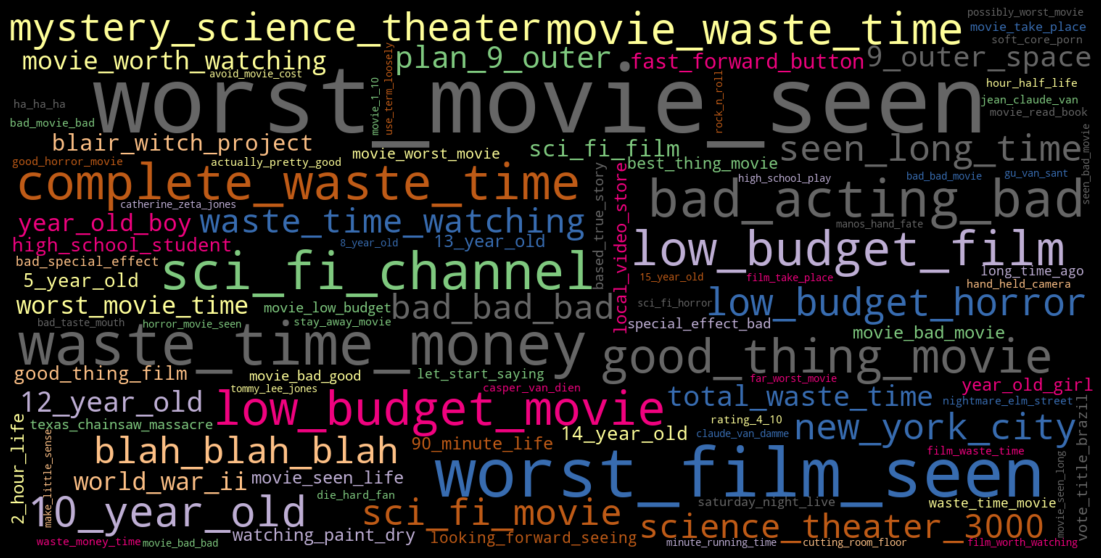

Wall time: 3.03 s


In [128]:
%%time
neg_words_dict = dict(neg_words_freq)
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=stopwords, colormap=colormap)
wordCloud.generate_from_frequencies(neg_words_dict)
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordCloud.to_file('wordcloud_neg_trigram.jpg')

* Entire

In [131]:
all_trigram = []
df_all_list = df['trigram'].tolist()
for l in df_all_list:
    all_trigram += l

In [132]:
%%time
#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(1, 1))
bag_of_words = vectorizer.fit_transform(all_trigram)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
all_words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
all_words_freq =sorted(all_words_freq, key = lambda x: x[1], reverse=True)
print (all_words_freq[:100])

[('worst_movie_seen', 552), ('new_york_city', 277), ('worst_film_seen', 254), ('world_war_ii', 231), ('based_true_story', 190), ('waste_time_money', 190), ('low_budget_film', 183), ('seen_long_time', 172), ('sci_fi_channel', 170), ('low_budget_movie', 158), ('10_year_old', 151), ('sci_fi_movie', 147), ('bad_acting_bad', 143), ('good_thing_movie', 138), ('low_budget_horror', 136), ('12_year_old', 129), ('best_movie_seen', 127), ('complete_waste_time', 126), ('movie_worth_watching', 124), ('year_old_boy', 120), ('sci_fi_film', 117), ('rock_n_roll', 115), ('vote_title_brazil', 109), ('14_year_old', 107), ('year_old_girl', 106), ('international_film_festival', 104), ('movie_waste_time', 101), ('feel_good_movie', 97), ('mystery_science_theater', 97), ('george_c_scott', 93), ('highly_recommend_movie', 93), ('high_school_student', 92), ('blah_blah_blah', 92), ('texas_chainsaw_massacre', 91), ('film_take_place', 91), ('william_h_macy', 89), ('movie_take_place', 87), ('local_video_store', 87), 

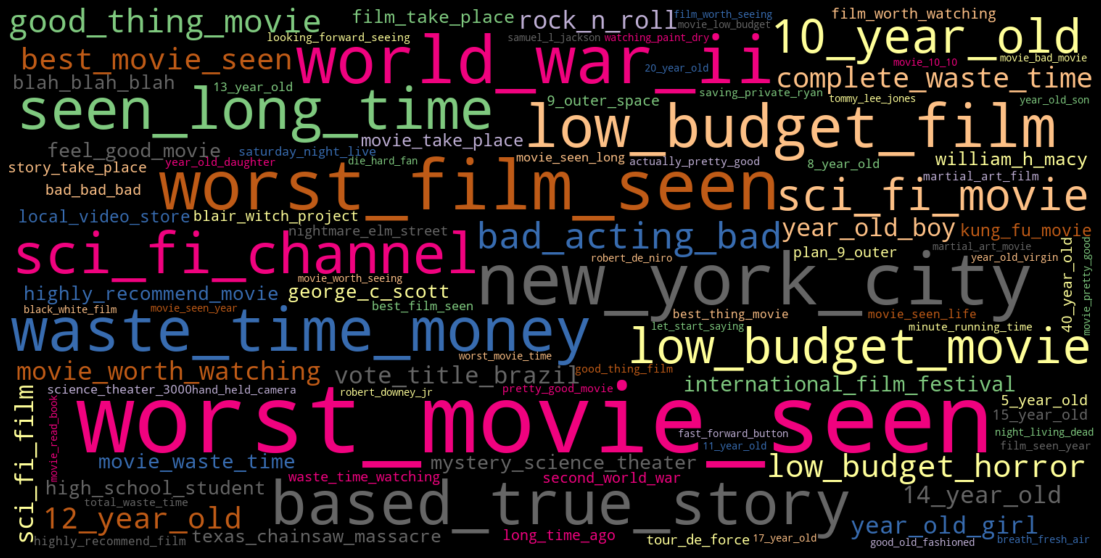

Wall time: 3.93 s


In [133]:
%%time
all_words_dict = dict(all_words_freq)
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=stopwords, colormap=colormap)
wordCloud.generate_from_frequencies(all_words_dict)
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordCloud.to_file('wordcloud_all_trigram.jpg')